IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from scipy import stats
from scipy.stats import norm
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
pd.options.display.float_format = "{:.5f}".format

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

READING THE DATASETS

In [ ]:
training_data = pd.read_csv("/content/train.csv")
testing_data = pd.read_csv("/content/test.csv")
sample_submission = pd.read_csv("/content/SampleSubmission.csv")

Printing the First Five Rows of the Training Dataset

In [ ]:
training_data.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58000,49.52000,17.40000,96.00000,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25000,33.40000,25.00000,75.00000,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18000,23.50000,24.90000,75.00000,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40000,15.48000,24.90000,70.00000,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30000,34.77000,20.90000,89.00000,0


Printing the First Five Rows of the Test Dataset

In [ ]:
testing_data.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,90.75000,114.78000,22.20000,56.00000
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,56.03000,52.18000,NaN,NaN
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,387.35000,346.73000,28.10000,63.00000
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,63.17000,83.85000,21.60000,82.00000
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,69.23000,53.07000,22.70000,80.00000


Printing the First Five Rows of the Submission Sample Dataset

In [ ]:
sample_submission.head()

,ID,Offset_fault
0,ID_STL3V9B2OU12,0
1,ID_U2EKAY4SGA94,0
2,ID_UJFLEWQR0U4N,0
3,ID_S2C2GPGA4R5I,0
4,ID_5V2C2ZL221H8,0


Printing the Shape Of All Three Datasets

In [ ]:
training_data.shape , testing_data.shape, sample_submission.shape

((297177, 7), (127361, 6), (127361, 2))

Getting a Description of the Training Dataset

In [ ]:
training_data.describe(include="all")

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,297177,297177,293563.00000,293563.00000,293628.00000,293628.00000,297177.00000
unique,297177,293751,NaN,NaN,NaN,NaN,NaN
top,ID_QF0ZTQJ2SF5Q,2021-11-26 17:23:00,NaN,NaN,NaN,NaN,NaN
freq,1,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,40.75120,38.18302,23.31655,78.65362,0.37107
std,NaN,NaN,28.52618,28.64776,3.83697,14.77272,0.48309
min,NaN,NaN,-9.45000,-9.70000,16.70000,27.00000,0.00000
25%,NaN,NaN,22.43000,19.52000,20.40000,68.00000,0.00000
50%,NaN,NaN,36.47000,33.72000,21.90000,84.00000,0.00000
75%,NaN,NaN,49.42000,47.57000,26.30000,91.00000,1.00000


SEPARATING THE ID COLUMN TO A DIFFERENT VARIABLE AND DROPPING IT IN THE TRAINING DATASET

In [ ]:
submit_id =testing_data["ID"]

In [ ]:
training_data = training_data.drop("ID", axis=1)

VISUALIZING THE TARGET COLUMN TO CHECK FOR IMBALANCE

0    186903
1    110274
Name: Offset_fault, dtype: int64


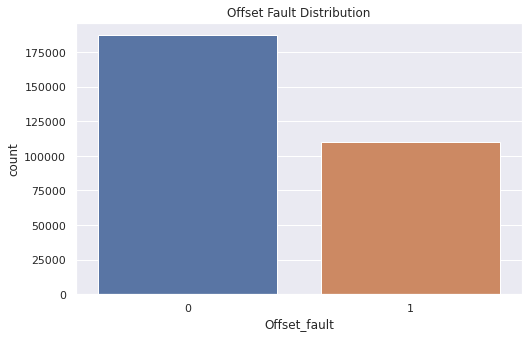

In [ ]:
print(training_data.Offset_fault.value_counts())
sns.set_style("darkgrid")
plt.figure(figsize = (8,5))
sns.countplot(training_data["Offset_fault"])
plt.title("Offset Fault Distribution")
plt.show()

FEATURE EXTRACTION FROM THE DATETIME COLUMN

In [ ]:
training_data.Datetime = pd.to_datetime(training_data.Datetime)
training_data["Month"] = training_data.Datetime.dt.month
training_data["Month"] = training_data["Month"].astype(int)
training_data["Hour"] = training_data.Datetime.dt.hour
training_data["Hour"] = training_data["Hour"].astype(int)
training_data["Day"] = training_data.Datetime.dt.day
training_data["Day"] = training_data["Day"].astype(int)

DROPPING THE DATETIME COLUMN

In [ ]:
training_data.drop("Datetime", axis=1, inplace=True)

CHECKING FOR MISSING DATA IN THE TRAINING DATASET

In [ ]:
missing_train = {}
for i in training_data.columns:
  number_missing = training_data[i].isnull().sum()
  print(i, number_missing)
  percentage_missing = round((number_missing/training_data.shape[0])*100, 2)
  print(i, percentage_missing)
  missing_train.__setitem__(i, percentage_missing)
print(missing_train)
missing_df = pd.DataFrame.from_dict(missing_train, orient="index")
print(missing_df)


Sensor1_PM2.5 3614
Sensor1_PM2.5 1.22
Sensor2_PM2.5 3614
Sensor2_PM2.5 1.22
Temperature 3549
Temperature 1.19
Relative_Humidity 3549
Relative_Humidity 1.19
Offset_fault 0
Offset_fault 0.0
Month 0
Month 0.0
Hour 0
Hour 0.0
Day 0
Day 0.0
{'Sensor1_PM2.5': 1.22, 'Sensor2_PM2.5': 1.22, 'Temperature': 1.19, 'Relative_Humidity': 1.19, 'Offset_fault': 0.0, 'Month': 0.0, 'Hour': 0.0, 'Day': 0.0}
                        0
Sensor1_PM2.5     1.22000
Sensor2_PM2.5     1.22000
Temperature       1.19000
Relative_Humidity 1.19000
Offset_fault      0.00000
Month             0.00000
Hour              0.00000
Day               0.00000


PLOTTING THE MISSING PERCENTAGE OF MISSING DATA FOR EACH COLUMN IN THE TRAINING DATASET

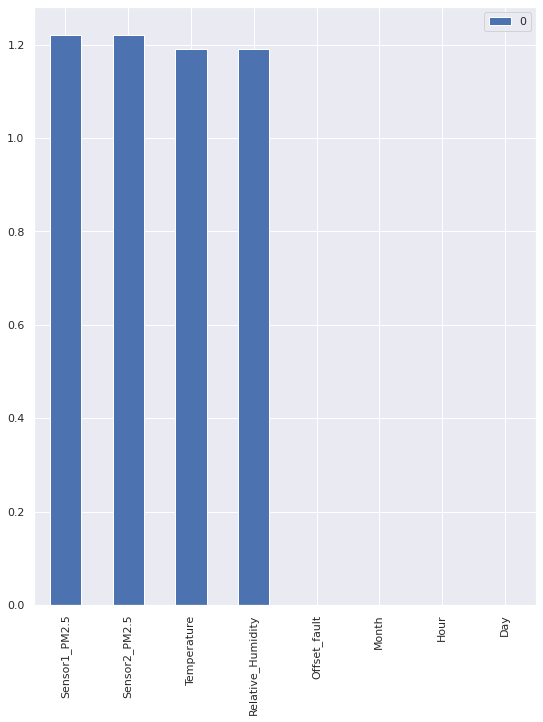

In [ ]:
missing_df.plot(kind="bar", figsize= (9,11))
plt.show()

CHECKING FOR MISSING VALUES IN THE TEST DATASET

In [ ]:
missing_test = {}
for i in testing_data.columns:
  number_missing = testing_data[i].isnull().sum()
  print(i, number_missing)
  percentage_missing = round((number_missing/testing_data.shape[0])*100, 2)
  print(i, percentage_missing)
  missing_test.__setitem__(i, percentage_missing)
print(missing_test)
missing_df = pd.DataFrame.from_dict(missing_test, orient="index")
print(missing_df)

ID 0
ID 0.0
Datetime 0
Datetime 0.0
Sensor1_PM2.5 0
Sensor1_PM2.5 0.0
Sensor2_PM2.5 0
Sensor2_PM2.5 0.0
Temperature 88090
Temperature 69.17
Relative_Humidity 88090
Relative_Humidity 69.17
{'ID': 0.0, 'Datetime': 0.0, 'Sensor1_PM2.5': 0.0, 'Sensor2_PM2.5': 0.0, 'Temperature': 69.17, 'Relative_Humidity': 69.17}
                         0
ID                 0.00000
Datetime           0.00000
Sensor1_PM2.5      0.00000
Sensor2_PM2.5      0.00000
Temperature       69.17000
Relative_Humidity 69.17000


PLOTTING THE PERCENTAGE OF MISSING VALUES FOR EACH COLUMN IN THE TRAIN DATASET

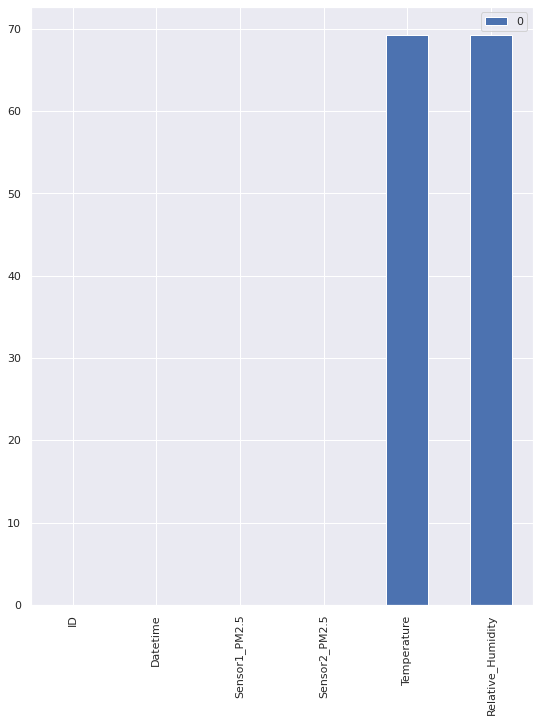

In [ ]:
missing_df.plot(kind="bar", figsize= (9,11))
plt.show()

FILLING MISSING VALUES IN BOTH THE TRAINING AND TEST DATASETS

In [ ]:
train_columns_to_fill = ["Sensor1_PM2.5", "Sensor2_PM2.5", "Temperature", "Relative_Humidity"]
test_columns_to_fill = ["Temperature", "Relative_Humidity"]
for i in train_columns_to_fill:
  training_data[i].ffill(inplace=True)
for j in test_columns_to_fill:
  testing_data[j].ffill(inplace=True)

CHECKING FOR ANY MORE MISSING VALUES

In [ ]:
print(training_data.isnull().sum().sum())
testing_data.isnull().sum().sum()

0


0

**MODELING THE TRAINING DATASET:**

VISUALIZATION TO FIND UNIVARIATE  AND BIVARIATE OUTLIERS

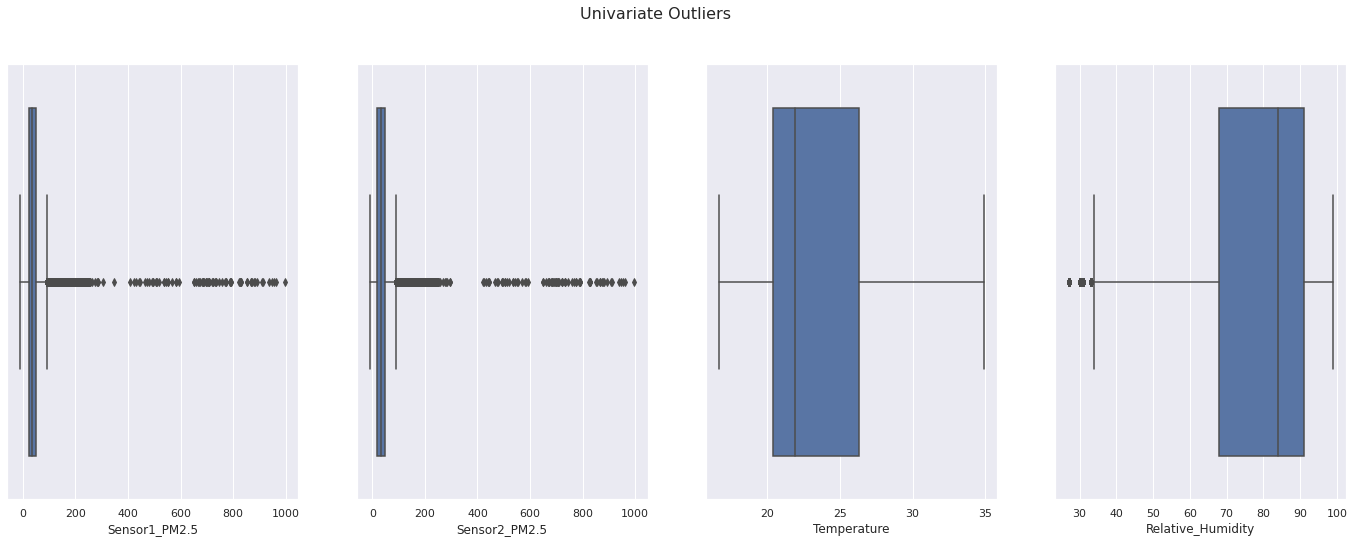

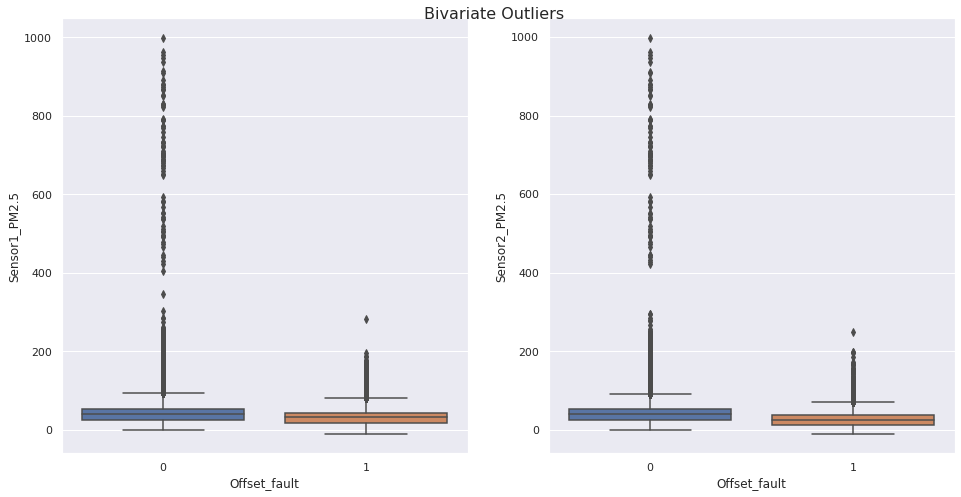

In [ ]:
# Checking for univariate outliers:
plt.rcParams["figure.figsize"]=(24,8)

plt.subplot(1,4,1)
sns.boxplot(training_data["Sensor1_PM2.5"])

plt.subplot(1,4,2)
sns.boxplot(training_data["Sensor2_PM2.5"])

plt.subplot(1,4,3)
sns.boxplot(training_data["Temperature"])

plt.subplot(1,4,4)
sns.boxplot(training_data["Relative_Humidity"])

plt.suptitle("Univariate Outliers", fontsize=16)
plt.show()

# Checking for bivariate outliers
sns.set_style("darkgrid")
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(16,8))
fig.suptitle("Bivariate Outliers", y=0.9, fontsize=16)
for ax, data, name in zip(axes.flatten(), training_data, ["Sensor1_PM2.5", "Sensor2_PM2.5"]):
  sns.boxplot(training_data["Offset_fault"], training_data[name], ax=ax)
plt.show()

VISUALIZATION TO CHECK THE CORRELATION BETWEEN COLUMNS

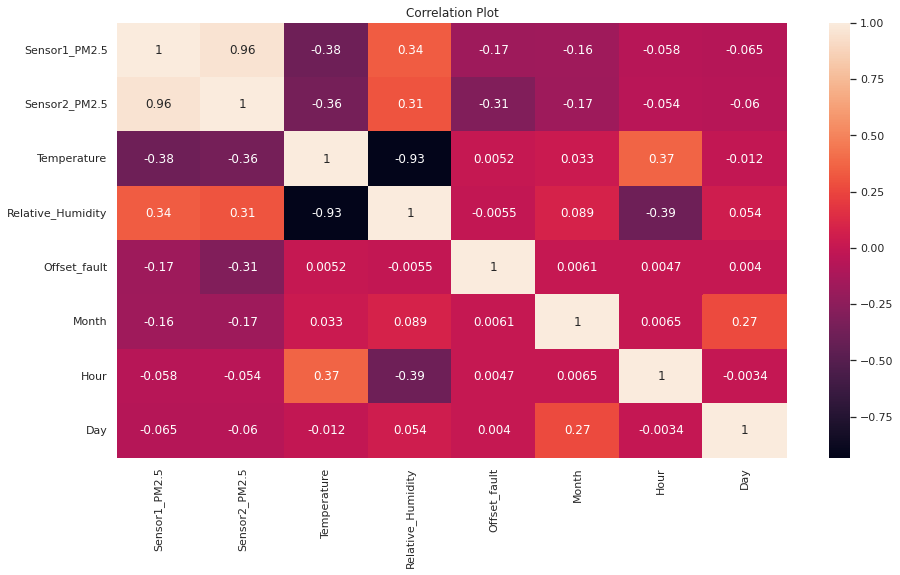

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
correlation = training_data.corr()
sns.heatmap(correlation, annot=True)
plt.title("Correlation Plot")
plt.show()

CAPPING THE OUTLIERS AND VISUALIZING THEM

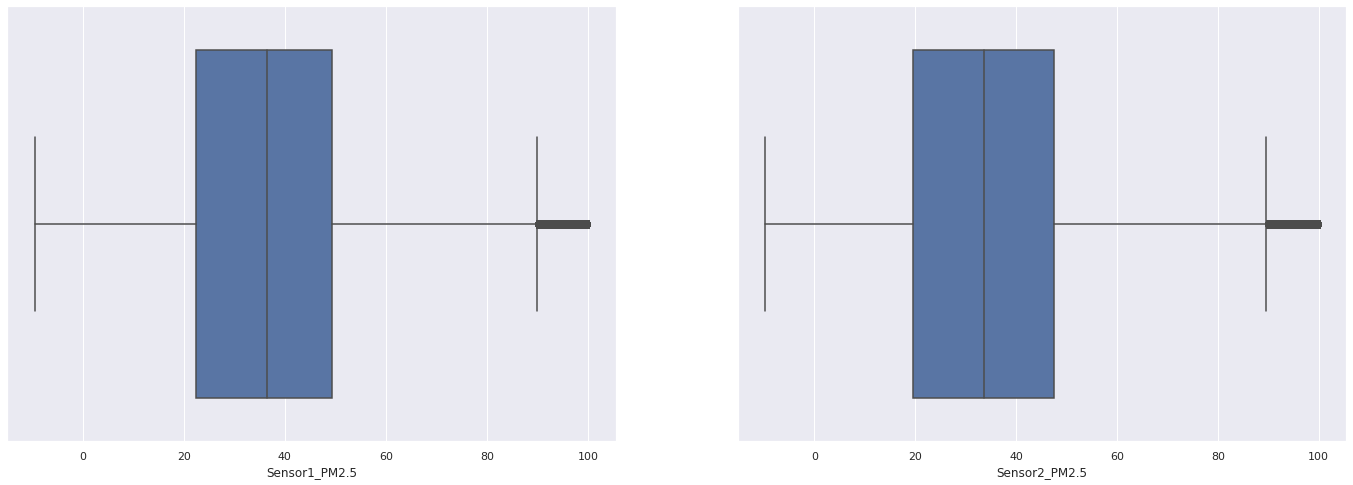

In [ ]:
training_data["Sensor1_PM2.5"].values[training_data["Sensor1_PM2.5"].values>100] = 100
training_data["Sensor2_PM2.5"].values[training_data["Sensor2_PM2.5"].values>100] = 100
plt.rcParams["figure.figsize"]=(24,8)

plt.subplot(1,2,1)
sns.boxplot(training_data["Sensor1_PM2.5"])

plt.subplot(1,2,2)
sns.boxplot(training_data["Sensor2_PM2.5"])
plt.show()

SPLITTING THE DATA INTO TEST AND VALIDATION SETS

In [ ]:
y = training_data["Offset_fault"]
x = training_data[["Sensor1_PM2.5",	"Sensor2_PM2.5", "Temperature", "Relative_Humidity", "Hour", "Month", "Day"]]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size= 0.2, random_state=5)
print(x_train.shape, y_val.shape)

(237741, 7) (59436,)


HANDLING TARGET IMBALANCE WITH SMOTE

In [ ]:
y_arr = np.array(y_train)

x_arr = np.array(x_train)
smote = SMOTE(sampling_strategy='minority', random_state=42)
# Fitting the model to generate the data.
smote_x, smote_y = smote.fit_resample(x_arr, y_arr)


smote_x = pd.DataFrame(data = smote_x, columns=["Sensor1_PM2.5", "Sensor2_PM2.5", "Temperature", "Relative_Humidity", "Month", "Day", "Hour"])
smote_y = pd.DataFrame(data = smote_y, columns=["Offset_fault"])
added_columns = [smote_x, smote_y]
df_train =pd.concat(added_columns, axis=1).drop_duplicates().reset_index(drop=True)
print(df_train.shape)
df_train.head()

(292738, 8)


,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Month,Day,Hour,Offset_fault
0,28.70000,26.32000,28.20000,60.00000,17.00000,12.00000,28.00000,0
1,65.62000,52.78000,19.20000,81.00000,5.00000,1.00000,6.00000,1
2,36.18000,30.15000,28.70000,66.00000,13.00000,11.00000,6.00000,1
3,27.25000,22.33000,29.10000,61.00000,12.00000,11.00000,12.00000,0
4,30.28000,27.73000,20.80000,87.00000,2.00000,1.00000,14.00000,1


Checking for the Datatypes of All Columns:

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292738 entries, 0 to 292737
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Sensor1_PM2.5      292738 non-null  float64
 1   Sensor2_PM2.5      292738 non-null  float64
 2   Temperature        292738 non-null  float64
 3   Relative_Humidity  292738 non-null  float64
 4   Month              292738 non-null  float64
 5   Day                292738 non-null  float64
 6   Hour               292738 non-null  float64
 7   Offset_fault       292738 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 17.9 MB


TRAINING THE TEST DATA WITH RANDOM FOREST CLASSIFIER AND MAKING PREDICTIONS

In [ ]:
rfc = RandomForestClassifier(criterion='gini',max_depth=None, max_features='auto',min_samples_leaf=1, min_samples_split=2,n_estimators=100, n_jobs=1,random_state=None)
rfc.fit(x_train,y_train)
predictions=rfc.predict(x_val)

CHECKING THE METRICS OF THE PREDICTIONS

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, predictions))

Accuracy: 0.966215761491352


In [ ]:
# Importing the dependancies
from sklearn import metrics
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
conf_matrix = metrics.confusion_matrix(y_val, predictions)
print(conf_matrix)
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_val, predictions))

[[36313   928]
 [ 1080 21115]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     37241
           1       0.96      0.95      0.95     22195

    accuracy                           0.97     59436
   macro avg       0.96      0.96      0.96     59436
weighted avg       0.97      0.97      0.97     59436



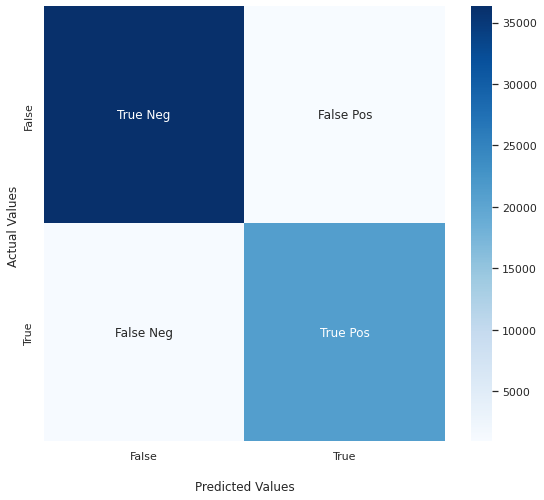

In [ ]:

sns.set(rc = {'figure.figsize':(9,8)})
labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

**MAKING PREDICTIONS ON THE TEST DATASET**:

In [ ]:
testing_data.Datetime = pd.to_datetime(testing_data.Datetime)
testing_data["Month"] = testing_data.Datetime.dt.month
testing_data["Month"] = testing_data["Month"].astype(int)
testing_data["Hour"] = testing_data.Datetime.dt.hour
testing_data["Hour"] = testing_data["Hour"].astype(int)
testing_data["Day"] = testing_data.Datetime.dt.day
testing_data["Day"] = testing_data["Day"].astype(int)

drop_columns = ["ID", "Datetime"]
testing_data = testing_data.drop(drop_columns, axis=1)
testing_data.head()
predictions2 = rfc.predict(testing_data)

WRITING THE RESULTS INTO A csv FILE

In [ ]:
submit_id =pd.DataFrame(data = submit_id, columns=["ID"])
pred =pd.DataFrame(data = predictions2, columns=["Offset_fault"]).astype(int)

submission_cols = [submit_id, pred]
submission = pd.concat(submission_cols, axis=1).reset_index(drop=True)
print(submission.head())
print(submission.info())

submission.to_csv('/content/umoja_submission.csv', index=False)

                ID  Offset_fault
0  ID_STL3V9B2OU12             0
1  ID_U2EKAY4SGA94             0
2  ID_UJFLEWQR0U4N             0
3  ID_S2C2GPGA4R5I             0
4  ID_5V2C2ZL221H8             0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127361 entries, 0 to 127360
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            127361 non-null  object
 1   Offset_fault  127361 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB
None
